In [ ]:
## Programming Problem 1

# Loading the required modules and libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Loading the dataset
dataset, metadata = tfds.load('tf_flowers', split='train', with_info=True, as_supervised=True)

# Splitting the dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * metadata.splits['train'].num_examples)
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images to 180x180
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Applying the preprocessing
train_ds = train_ds.map(preprocess).cache().shuffle(1000).batch(32)
val_ds = val_ds.map(preprocess).cache().batch(32)

In [ ]:
# Building the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(metadata.features['label'].num_classes, activation='softmax')  # Number of classes
])

# The learning rate callback
lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=0
)

# Compiling the model
lr = 1e-3  # initial learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training with callback
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    callbacks=[lr_callback])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.3629 - loss: 1.4313 - val_accuracy: 0.5518 - val_loss: 1.0661 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5450 - loss: 1.1170 - val_accuracy: 0.5967 - val_loss: 1.0037 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6428 - loss: 0.9410 - val_accuracy: 0.6676 - val_loss: 0.8421 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6954 - loss: 0.8054 - val_accuracy: 0.6948 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7434 - loss: 0.7013 - val_accuracy: 0.6921 - val_loss: 0.8724 - learning_rate: 0.0010
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7667 - loss: 0.6342 - val_accuracy: 0.6730 - val_loss: 0.8529 - learning_rate: 0.0010
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8334 - loss: 0.4613 - val_accuracy: 0.

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,915,857 (37.83 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,572 (25.22 MB)

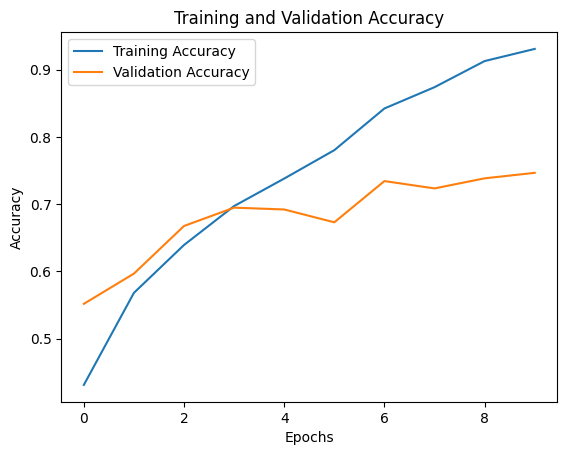

In [ ]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Collecting all predictions and labels for the validation set
all_labels = []
all_predictions = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    predicted_classes = np.argmax(preds, axis=1)
    all_labels.extend(labels.numpy())
    all_predictions.extend(predicted_classes)

# Generating classification report
class_names = [metadata.features['label'].int2str(i) for i in range(metadata.features['label'].num_classes)]

classification_report_str = classification_report(all_labels, all_predictions, target_names=class_names)

# Print the results
print("Classification Report:")
print(classification_report_str)

Classification Report:
              precision    recall  f1-score   support

   dandelion       0.75      0.81      0.78       158
       daisy       0.65      0.77      0.71       141
      tulips       0.73      0.64      0.68       146
  sunflowers       0.89      0.87      0.88       151
       roses       0.71      0.63      0.67       138

    accuracy                           0.75       734
   macro avg       0.75      0.74      0.74       734
weighted avg       0.75      0.75      0.75       734



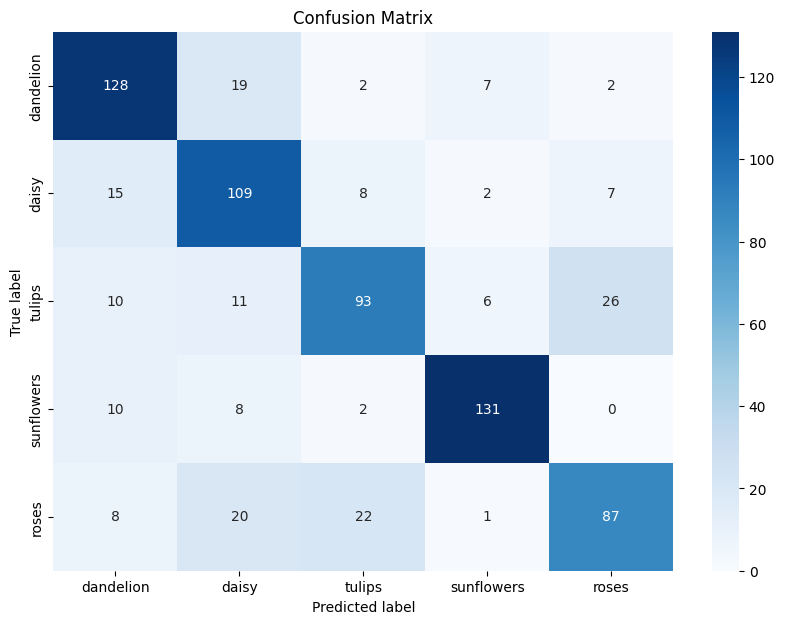

In [ ]:
# Generating the confusion matrix
confusion_matrix_result = confusion_matrix(all_labels, all_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0228
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5311e-04
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3453e-04
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7355e-04
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8754e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7156e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4292e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7246e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0963e-04
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5197e-04
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7635e-04
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7593e-04
Epoch 13/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8380e-04
Epoch 14/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5727e-04
Epoch 15/20
49/49 ━━━━━━━━━━

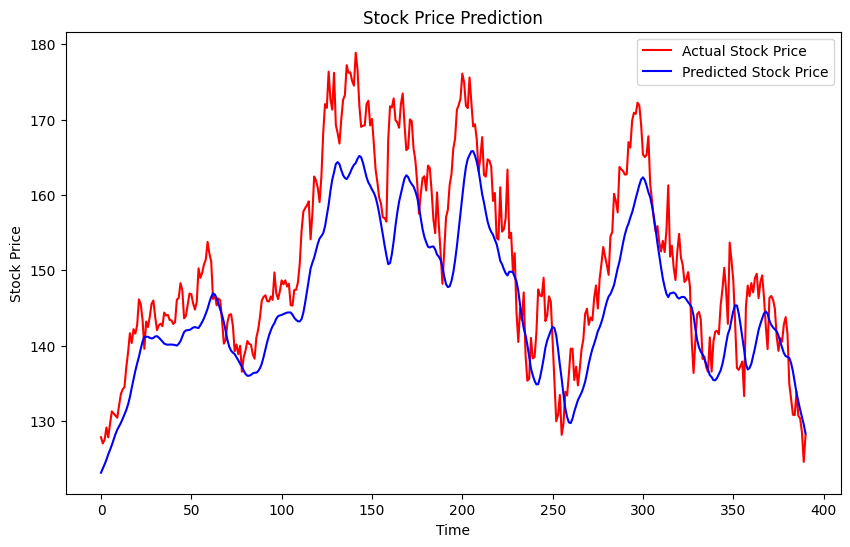

In [ ]:
## Programming Problem 2

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv('A6.csv')  # Make sure to provide the correct path to your dataset

# Preprocessing the data
prices = data['Close'].values
prices = prices.reshape(-1, 1)

# Normalizing the stock prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Creating sequences of 60 days of stock prices as input and the next day's price as the target
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Setting the time step
time_step = 60
X, y = create_dataset(scaled_prices, time_step)

# Reshaping input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the dataset
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the RNN model using LSTM layers
model = models.Sequential([
  layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
  layers.LSTM(50, return_sequences=False),
  layers.Dense(25, activation = 'relu'),
  layers.Dense(1)
])

# Model Summary
model.summary()

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predicting stock prices on the test set
predicted_prices = model.predict(X_test, verbose = 0)

# Inverse transforming the predicted prices to the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform the actual prices to the original scale
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()